<a href="https://colab.research.google.com/github/Omar-Abd-Elwahab/VCF_filter/blob/main/snp_model_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Opening the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/hg003_snps.csv /content
!cp ./drive/MyDrive/Colab\ Notebooks/deepref/unique_words.txt /content


In [ ]:
ls

drive/  hg003_snps.csv  sample_data/  unique_words.txt  ww.txt


In [ ]:
pwd

'/content'

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
dat = pd.read_csv("hg003_snps.csv", low_memory=False)
dat = dat.drop(dat.columns[[0, 1, 2]], axis=1)

# Report the number of sentences.
print('Number of training lines: {:,}\n'.format(dat.shape[0]))

# Display 10 random rows from the data.
dat.sample(3)

Number of training lines: 10,787,570



,QUAL,FILTER,INFO,FORMAT,HG003
3942481,109.415,0,DP=4;VDB=0.149052;FS=0.0;SGB=-0.556411;MQ0F=0....,GT:PL,"1/1:139,12,0"
3677337,86.415,0,DP=4;VDB=0.152777;MQSBZ=-0.57735;FS=0.0;SGB=-0...,GT:PL,"1/1:116,12,0"
9066799,222.64,0,AC=1;AF=0.5;AN=2;BaseQRankSum=1.068;DP=9;Exces...,GT:AD:DP:GQ:PL,"0/1:2,6:8:29:230,0,29"


In [ ]:
dat=dat[1:]

In [ ]:
dat.groupby('FILTER').size()

FILTER
0    9319803
1    1467766
dtype: int64

In [ ]:
df = dat.sample(1000000, random_state=42)
print(df.groupby('FILTER').size())
# Report the number of sentences.
print('Number of training lines: {:,}\n'.format(df.shape[0]))
# Display 10 random rows from the data.
df.sample(10)

FILTER
0    864294
1    135706
dtype: int64
Number of training lines: 1,000,000



,QUAL,FILTER,INFO,FORMAT,HG003
3443593,42.3036,0,DP=7;VDB=0.301053;RPBZ=1.76777;BQBZ=-1.1547;SC...,GT:PL,"0/1:75,0,115"
6340013,31.4072,0,DP=4;VDB=0.6;RPBZ=-0.774597;FS=0.0;SGB=-0.4536...,GT:PL,"0/1:64,0,64"
4247742,162.416,0,DP=8;VDB=0.98831;FS=0.0;SGB=-0.651104;MQ0F=0.0...,GT:PL,"1/1:192,24,0"
6084606,45.4349,0,DP=16;VDB=0.535497;RPBZ=-0.98094;BQBZ=1.42209;...,GT:PL,"0/1:79,0,247"
10487956,187.64,1,AC=1;AF=0.5;AN=2;BaseQRankSum=0.674;DP=10;Exce...,GT:AD:DP:GQ:PL,"0/1:5,5:10:99:195,0,188"
4233511,225.417,0,DP=12;VDB=0.281616;MQSBZ=0.123091;FS=0.0;SGB=-...,GT:PL,"1/1:255,36,0"
9231577,477.06,0,AC=2;AF=1.0;AN=2;DP=13;ExcessHet=0.0;FS=0.0;ML...,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:491,33,0"
3495407,93.8791,0,DP=7;VDB=0.266887;RPBZ=-1.5;SCBZ=-1.65503;FS=0...,GT:PL,"0/1:129,0,17"
1400983,278,0,FR=1.0;MMLQ=38.0;TCR=7;HP=2;WE=74170191;Source...,GT:GL:GOF:GQ:NR:NV,"1/1:-31.3,-2.41,0.0:17.0:24:9:9"
2057306,97,0,FR=0.5;MMLQ=38.0;TCR=5;HP=2;WE=86442877;Source...,GT:GL:GOF:GQ:NR:NV,"1/0:-13.79,0.0,-29.59:7.0:99:12:5"


In [ ]:

# Assuming you have a DataFrame called 'df' with columns 'col1', 'col2', 'col3', and 'col_to_exclude'

# Get all column names except the one to exclude
columns_to_merge = [col for col in df.columns if col != 'FILTER']

# Define a lambda function to merge the values of selected columns
merge_columns = lambda row: ' '.join(str(row[col]) for col in columns_to_merge)

# Merge columns using the defined function
df['merged_column'] = df.apply(merge_columns, axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_merge)

# Print the resulting DataFrame
print(df.sample(10))


        FILTER                                      merged_column
4144889      0  22.2526 DP=5;VDB=0.52;RPBZ=-1.1547;SCBZ=-0.816...
146891       0  23 FR=0.5;MMLQ=35.0;TCR=8;HP=1;WE=164546619;So...
8772717      0  188.64 AC=1;AF=0.5;AN=2;BaseQRankSum=0.239;DP=...
7773106      0  299.02 AC=2;AF=1.0;AN=2;DP=7;ExcessHet=0.0;FS=...
4992446      0  87.2425 DP=8;VDB=0.489846;RPBZ=-1.64963;BQBZ=-...
3811417      0  118.395 DP=12;VDB=0.958818;RPBZ=0.182574;BQBZ=...
1893095      0  37 FR=0.5;MMLQ=15.0;TCR=4;HP=1;WE=77886376;Sou...
9057711      1  46.64 AC=1;AF=0.5;AN=2;BaseQRankSum=-1.917;DP=...
2532581      0  36 FR=0.5;MMLQ=34.0;TCR=2;HP=2;WE=35541786;Sou...
9808770      0  446.06 AC=2;AF=1.0;AN=2;DP=12;ExcessHet=0.0;FS...


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA A100-SXM4-40GB


In [ ]:
!pip install transformers

In [ ]:
!tail -45 unique_words.txt > ww.txt

In [ ]:
#save words that can not be split
ww = open('ww.txt')
never_split = ww.readlines()
res = ['platypus']
for sub in never_split:
    res.append(sub.replace("\n", ""))
res

['platypus',
 'indel',
 'idv',
 'imf',
 'dp',
 'vdb',
 'rpbz',
 'mqbz',
 'bqbz',
 'mqsbz',
 'scbz',
 'fs',
 'sgb',
 'mq0f',
 'dp4',
 'mq',
 'mmlq',
 'tcr',
 'ws',
 'nf',
 'tcf',
 'mgof',
 'sbpval',
 'readposranksum',
 'qd',
 'brf',
 'hapscore',
 'gq',
 'gof',
 'gl',
 'nv',
 'badreads',
 'allelebias',
 'hp10',
 'q20',
 'strandbias',
 'qualdepth',
 'refcall',
 'baseqranksum',
 'excesshet',
 'inbreedingcoeff',
 'mleac',
 'mleaf',
 'mqranksum',
 'sor',
 'lowqual']

In [ ]:
#tokens and transformers structure

from transformers import BertConfig, BertModel, BertTokenizer,  BertForSequenceClassification

tokenizer = BertTokenizer("unique_words.txt", do_lower_case = True,
                          do_basic_tokenize = True, never_split = res,
                          unk_token = '[UNK]', sep_token = '[SEP]', pad_token = '[PAD]',
                          cls_token = '[CLS]', mask_token = '[MASK]',
                          tokenize_chinese_chars = False, strip_accents = None)
config = BertConfig(vocab_size = len(tokenizer), hidden_size = 256,
                           num_hidden_layers = 8, num_attention_heads = 8,
                           intermediate_size = 1024, hidden_act = 'gelu',
                           hidden_dropout_prob = 0.1, attention_probs_dropout_prob = 0.1,
                           max_position_embeddings = 512,
                           initializer_range = 0.02, layer_norm_eps = 1e-12,
                           pad_token_id = 0, position_embedding_type = 'absolute',
                           use_cache = False, classifier_dropout = 0.1, num_labels=2,
                           output_attentions = False, # Whether the model returns attentions weights.
                           output_hidden_states = False, # Whether the model returns all hidden-states.
)
model =  BertForSequenceClassification(config)


In [ ]:
# Get the lists of sentences and their labels.
sentences = df.merged_column.values
labels = df.FILTER.values

In [ ]:
import numpy as np
labels = labels.astype(np.int64)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  188 FR=1.0;MMLQ=35.0;TCR=6;HP=3;WE=34402384;Source=Platypus;WS=34402366;PP=188.0;TR=6;NF=2;TCF=3;NR=4;TC=9;MGOF=4;SbPval=0.65;MQ=60.0;QD=37.1285354245;SC=AACAGGTAAACCTCTAGCAAG;BRF=0.44;HapScore=2 GT:GL:GOF:GQ:NR:NV 1/1:-22.3,-1.51,0.0:4.0:15:9:6
Tokenized:  ['188', 'fr', '=', '1', '.', '0', ';', 'mmlq', '=', '35', '.', '0', ';', 'tcr', '=', '6', ';', 'hp', '=', '3', ';', 'we', '=', '344', '##0', '##23', '##8', '##4', ';', 'source', '=', 'platypus', ';', 'ws', '=', '344', '##0', '##23', '##66', ';', 'pp', '=', '188', '.', '0', ';', 'tr', '=', '6', ';', 'nf', '=', '2', ';', 'tcf', '=', '3', ';', 'nr', '=', '4', ';', 'tc', '=', '9', ';', 'mgof', '=', '4', ';', 'sbpval', '=', '0', '.', '65', ';', 'mq', '=', '60', '.', '0', ';', 'qd', '=', '37', '.', '128', '##53', '##54', '##24', '##5', ';', 'sc', '=', 'aa', '##ca', '##gg', '##ta', '##aa', '##cc', '##tc', '##tag', '##ca', '##ag', ';', 'brf', '=', '0', '.', '44', ';', 'hapscore', '=', '2', 'gt', ':', 'gl', ':', 'gof', ':', 'gq',

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  188 FR=1.0;MMLQ=35.0;TCR=6;HP=3;WE=34402384;Source=Platypus;WS=34402366;PP=188.0;TR=6;NF=2;TCF=3;NR=4;TC=9;MGOF=4;SbPval=0.65;MQ=60.0;QD=37.1285354245;SC=AACAGGTAAACCTCTAGCAAG;BRF=0.44;HapScore=2 GT:GL:GOF:GQ:NR:NV 1/1:-22.3,-1.51,0.0:4.0:15:9:6
Token IDs: [101, 19121, 10424, 1027, 1015, 1012, 1014, 1025, 30537, 1027, 3486, 1012, 1014, 1025, 30538, 1027, 1020, 1025, 6522, 1027, 1017, 1025, 2057, 1027, 29386, 2692, 21926, 2620, 2549, 1025, 3120, 1027, 100, 1025, 30539, 1027, 29386, 2692, 21926, 28756, 1025, 4903, 1027, 19121, 1012, 1014, 1025, 19817, 1027, 1020, 1025, 30540, 1027, 1016, 1025, 30541, 1027, 1017, 1025, 17212, 1027, 1018, 1025, 22975, 1027, 1023, 1025, 30542, 1027, 1018, 1025, 30543, 1027, 1014, 1012, 3515, 1025, 30536, 1027, 3438, 1012, 1014, 1025, 30545, 1027, 4261, 1012, 11899, 22275, 27009, 18827, 2629, 1025, 8040, 1027, 9779, 3540, 13871, 2696, 11057, 9468, 13535, 15900, 3540, 8490, 1025, 30546, 1027, 1014, 1012, 4008, 1025, 30547, 1027, 1016, 14181, 1024, 

In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  179


In [ ]:
from keras.utils import pad_sequences
# We'll borrow the `pad_sequences` utility function to do this.
from keras.utils import pad_sequences
# Set the maximum sequence length.
# I've chosen a number somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length
MAX_LEN = 200

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 200 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:

    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [ ]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 60% for training and 40% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=42, test_size=0.4)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.4)

In [ ]:
# Convert all inputs and labels into torch tensors, the required datatype
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32, but given our data size, we are using a bigger batch size

batch_size = 750

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

#model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30567, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-7): 8 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, e

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 137 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30567, 256)
bert.embeddings.position_embeddings.weight                (512, 256)
bert.embeddings.token_type_embeddings.weight                (2, 256)
bert.embeddings.LayerNorm.weight                              (256,)
bert.embeddings.LayerNorm.bias                                (256,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (256, 256)
bert.encoder.layer.0.attention.self.query.bias                (256,)
bert.encoder.layer.0.attention.self.key.weight            (256, 256)
bert.encoder.layer.0.attention.self.key.bias                  (256,)
bert.encoder.layer.0.attention.self.value.weight          (256, 256)
bert.encoder.layer.0.attention.self.value.bias                (256,)
bert.encoder.layer.0.attention.output.dense.weight        (256, 256)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
from torch.optim import AdamW, Adam
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )



In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 30

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))



======== Epoch 1 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:51.
  Batch   500  of    800.    Elapsed: 0:06:03.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.33141
  Training epcoh took: 0:09:40

Running Validation...
Confusion Matrix:
[[336275   9058]
 [ 33740  20927]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    345333
           1       0.70      0.38      0.49     54667

    accuracy                           0.89    400000
   macro avg       0.80      0.68      0.72    400000
weighted avg       0.88      0.89      0.88    400000

Accuracy score:
0.893005
Weighted precision_recall_f1score:
(0.8799914844219513, 0.893005, 0.8792525738504622, None)
  Accuracy: 0.8930

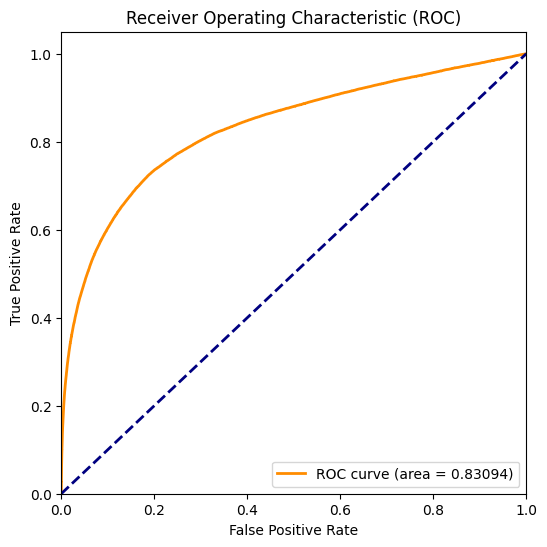


======== Epoch 2 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.28289
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339728   5605]
 [ 34926  19741]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94    345333
           1       0.78      0.36      0.49     54667

    accuracy                           0.90    400000
   macro avg       0.84      0.67      0.72    400000
weighted avg       0.89      0.90      0.88    400000

Accuracy score:
0.8986725
Weighted precision_recall_f1score:
(0.8892958335080304, 0.8986725, 0.8821698673892626, None)
  Accuracy: 0.89

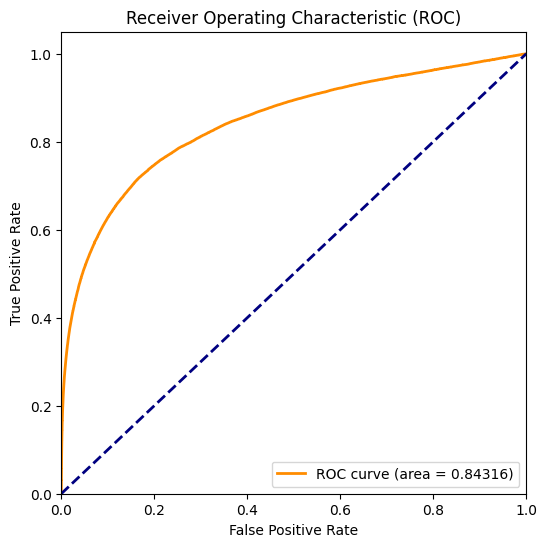


======== Epoch 3 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.27272
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339071   6262]
 [ 33050  21617]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95    345333
           1       0.78      0.40      0.52     54667

    accuracy                           0.90    400000
   macro avg       0.84      0.69      0.73    400000
weighted avg       0.89      0.90      0.89    400000

Accuracy score:
0.90172
Weighted precision_recall_f1score:
(0.892625587101071, 0.90172, 0.8876077537068718, None)
  Accuracy: 0.90173
 

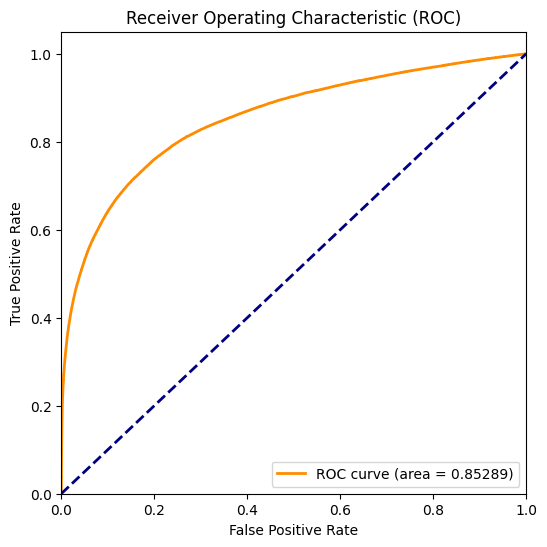


======== Epoch 4 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.26611
  Training epcoh took: 0:09:38

Running Validation...
Confusion Matrix:
[[341353   3980]
 [ 35077  19590]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.83      0.36      0.50     54667

    accuracy                           0.90    400000
   macro avg       0.87      0.67      0.72    400000
weighted avg       0.90      0.90      0.89    400000

Accuracy score:
0.9023575
Weighted precision_recall_f1score:
(0.8964743059048644, 0.9023575, 0.8850558834544631, None)
  Accuracy: 0.90

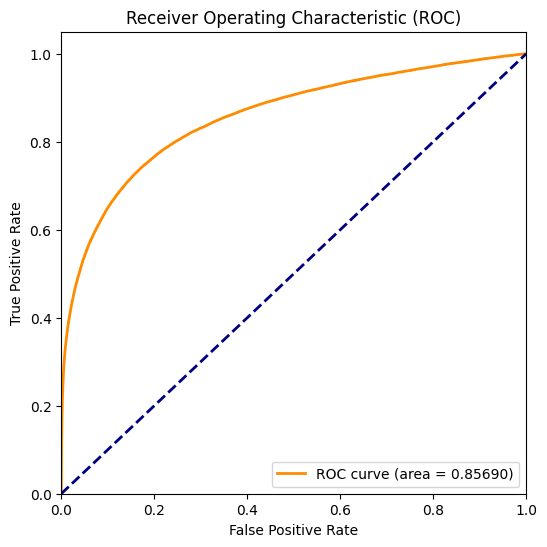


======== Epoch 5 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.26248
  Training epcoh took: 0:09:37

Running Validation...
Confusion Matrix:
[[340595   4738]
 [ 33687  20980]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.82      0.38      0.52     54667

    accuracy                           0.90    400000
   macro avg       0.86      0.69      0.73    400000
weighted avg       0.90      0.90      0.89    400000

Accuracy score:
0.9039375
Weighted precision_recall_f1score:
(0.8971182289480887, 0.9039375, 0.8885722588460551, None)
  Accuracy: 0.90

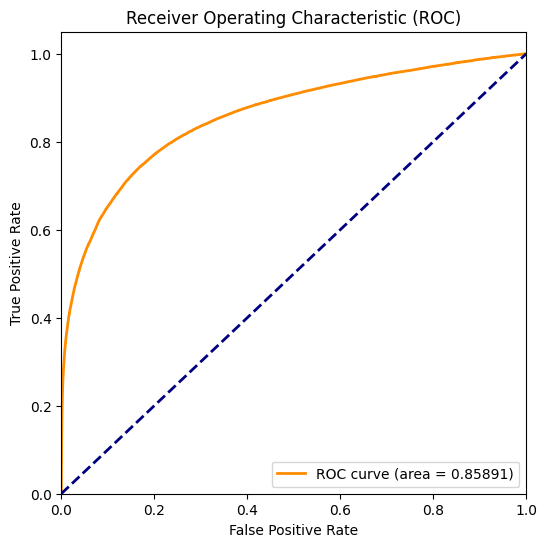


======== Epoch 6 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:48.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.25956
  Training epcoh took: 0:09:38

Running Validation...
Confusion Matrix:
[[338397   6936]
 [ 31132  23535]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.77      0.43      0.55     54667

    accuracy                           0.90    400000
   macro avg       0.84      0.71      0.75    400000
weighted avg       0.90      0.90      0.89    400000

Accuracy score:
0.90483
Weighted precision_recall_f1score:
(0.8961570356296309, 0.90483, 0.8929170796186993, None)
  Accuracy: 0.90483


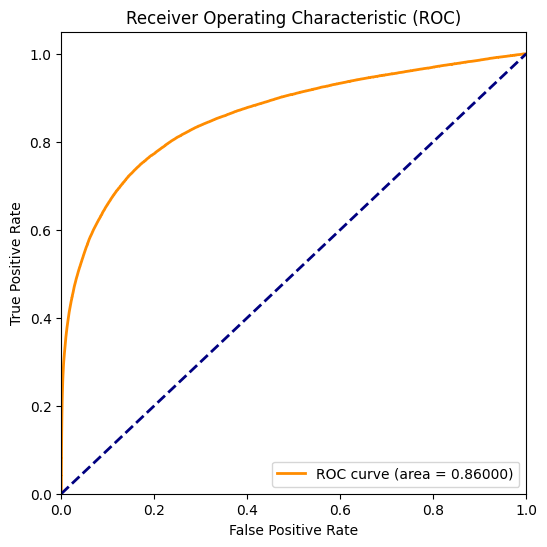


======== Epoch 7 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:48.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.25678
  Training epcoh took: 0:09:38

Running Validation...
Confusion Matrix:
[[340568   4765]
 [ 32833  21834]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.82      0.40      0.54     54667

    accuracy                           0.91    400000
   macro avg       0.87      0.69      0.74    400000
weighted avg       0.90      0.91      0.89    400000

Accuracy score:
0.906005
Weighted precision_recall_f1score:
(0.8996046206618298, 0.906005, 0.8916081480226871, None)
  Accuracy: 0.9060

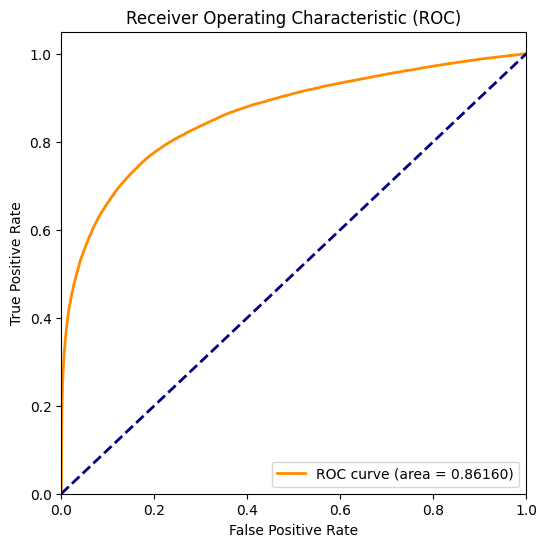


======== Epoch 8 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:48.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.25465
  Training epcoh took: 0:09:37

Running Validation...
Confusion Matrix:
[[338946   6387]
 [ 30892  23775]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.79      0.43      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.85      0.71      0.75    400000
weighted avg       0.90      0.91      0.89    400000

Accuracy score:
0.9068025
Weighted precision_recall_f1score:
(0.8989469290252396, 0.9068025, 0.8949379580508784, None)
  Accuracy: 0.90

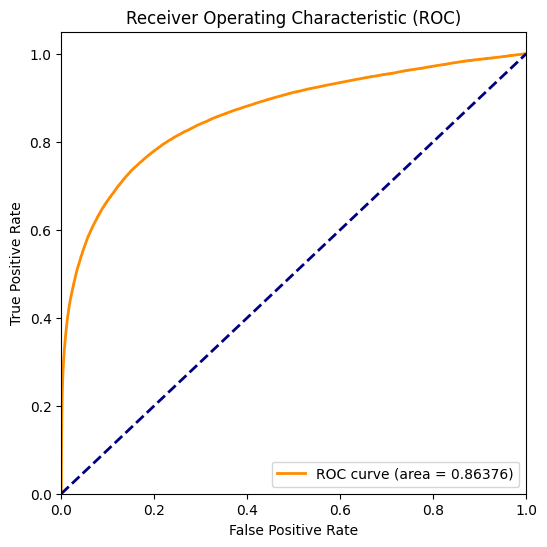


======== Epoch 9 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:03.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.25241
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340061   5272]
 [ 31804  22863]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95    345333
           1       0.81      0.42      0.55     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.70      0.75    400000
weighted avg       0.90      0.91      0.89    400000

Accuracy score:
0.90731
Weighted precision_recall_f1score:
(0.9005538515303309, 0.90731, 0.8941742941561721, None)
  Accuracy: 0.90732


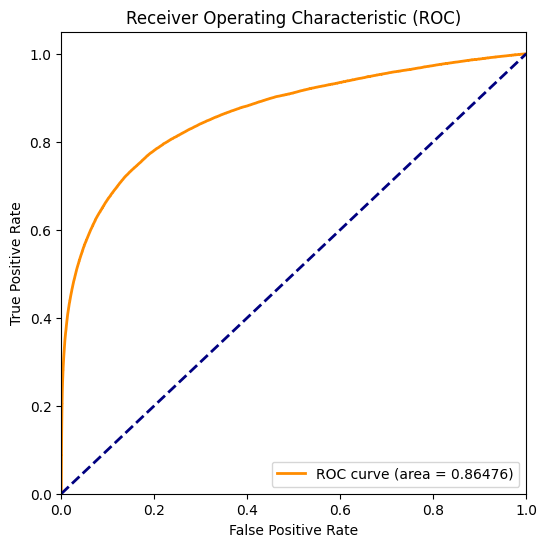


======== Epoch 10 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:26.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.25068
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340082   5251]
 [ 31495  23172]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.82      0.42      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.87      0.70      0.75    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.908135
Weighted precision_recall_f1score:
(0.9015750241888157, 0.908135, 0.8953086627572236, None)
  Accuracy: 0.908

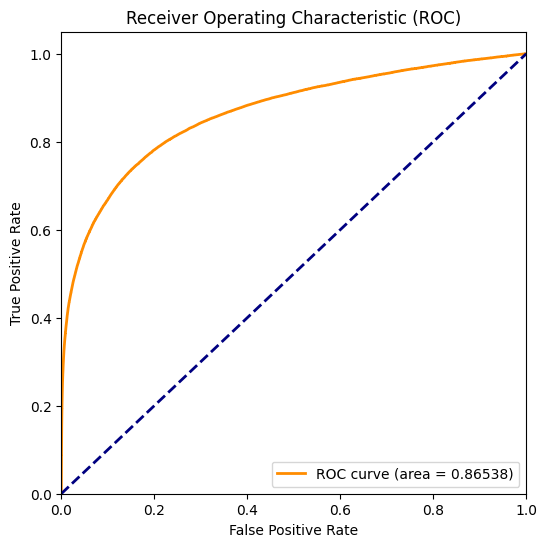


======== Epoch 11 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.24918
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340052   5281]
 [ 31362  23305]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.82      0.43      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.87      0.71      0.75    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9083925
Weighted precision_recall_f1score:
(0.9018526034611343, 0.9083925, 0.8957100837041874, None)
  Accuracy: 0.9

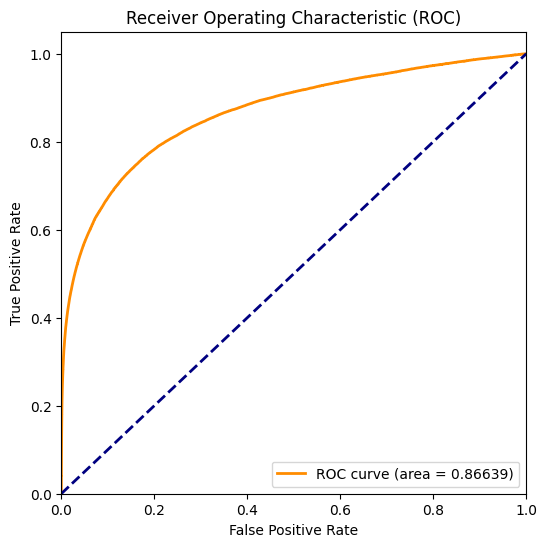


======== Epoch 12 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.24775
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339380   5953]
 [ 30536  24131]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.80      0.44      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9087775
Weighted precision_recall_f1score:
(0.9016895573030783, 0.9087775, 0.8971150853519313, None)
  Accuracy: 0.9

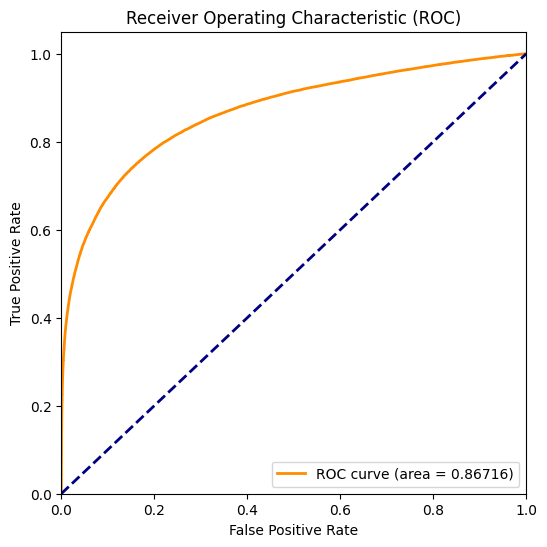


======== Epoch 13 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.24652
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[341363   3970]
 [ 32983  21684]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.85      0.40      0.54     54667

    accuracy                           0.91    400000
   macro avg       0.88      0.69      0.74    400000
weighted avg       0.90      0.91      0.89    400000

Accuracy score:
0.9076175
Weighted precision_recall_f1score:
(0.9027836899067668, 0.9076175, 0.8927947590201653, None)
  Accuracy: 0.9

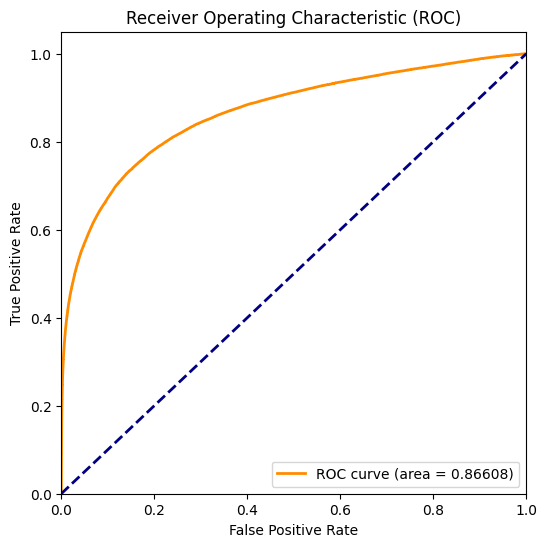


======== Epoch 14 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.24549
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[338503   6830]
 [ 29469  25198]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.79      0.46      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.85      0.72      0.77    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9092525
Weighted precision_recall_f1score:
(0.9017156368795521, 0.9092525, 0.8988439576027135, None)
  Accuracy: 0.9

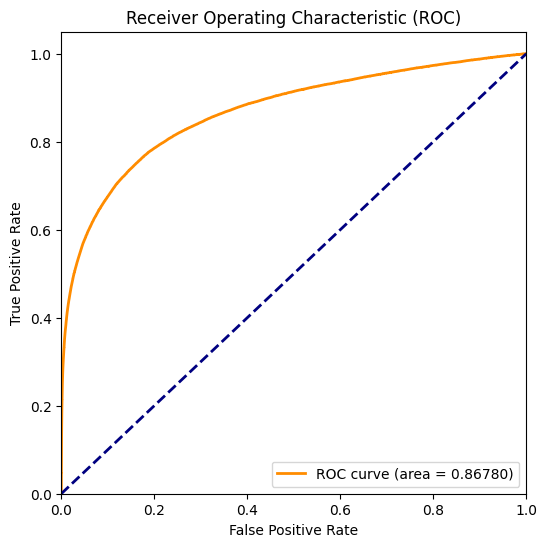


======== Epoch 15 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.24424
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339576   5757]
 [ 30514  24153]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.44      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9093225
Weighted precision_recall_f1score:
(0.9025126404418543, 0.9093225, 0.8976200784550299, None)
  Accuracy: 0.9

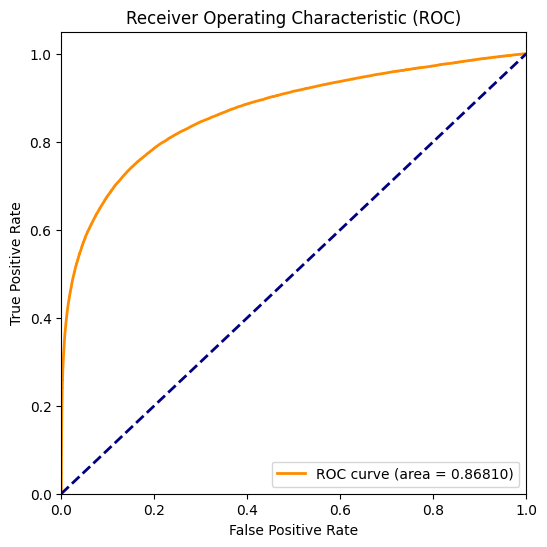


======== Epoch 16 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:26.

  Average training loss: 0.24294
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339716   5617]
 [ 30788  23879]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.44      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9089875
Weighted precision_recall_f1score:
(0.9022331778792066, 0.9089875, 0.896977882663855, None)
  Accuracy: 0.90

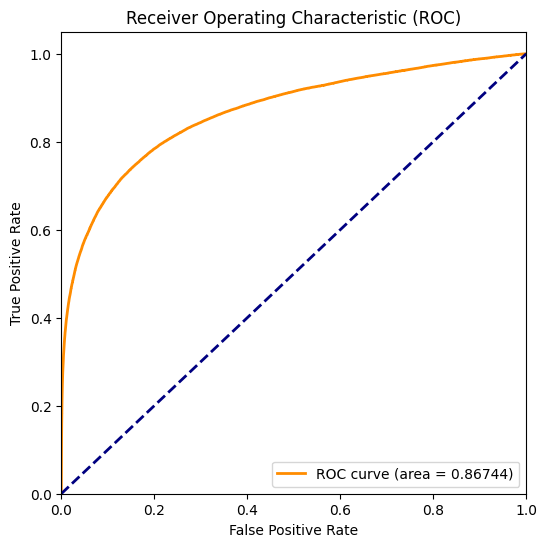


======== Epoch 17 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.24206
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339113   6220]
 [ 29924  24743]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.80      0.45      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.72      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.90964
Weighted precision_recall_f1score:
(0.9025407582609205, 0.90964, 0.8986324718764543, None)
  Accuracy: 0.90965

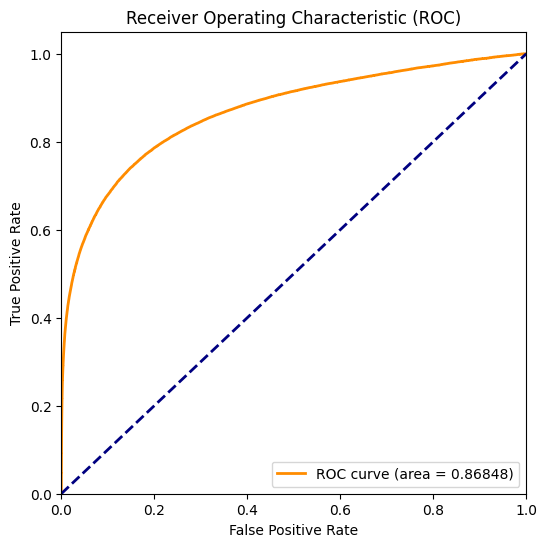


======== Epoch 18 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.24107
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340073   5260]
 [ 30917  23750]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.82      0.43      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.87      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9095575
Weighted precision_recall_f1score:
(0.9032727980144106, 0.9095575, 0.8973115013770526, None)
  Accuracy: 0.9

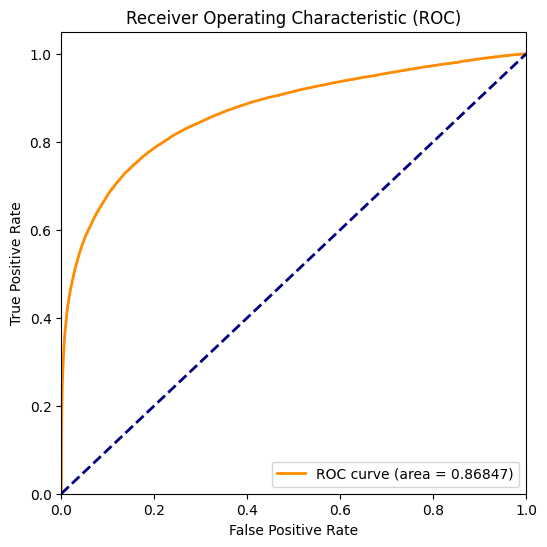


======== Epoch 19 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.24004
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340856   4477]
 [ 31682  22985]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.84      0.42      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.88      0.70      0.75    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9096025
Weighted precision_recall_f1score:
(0.9042987765737186, 0.9096025, 0.896343428453888, None)
  Accuracy: 0.90

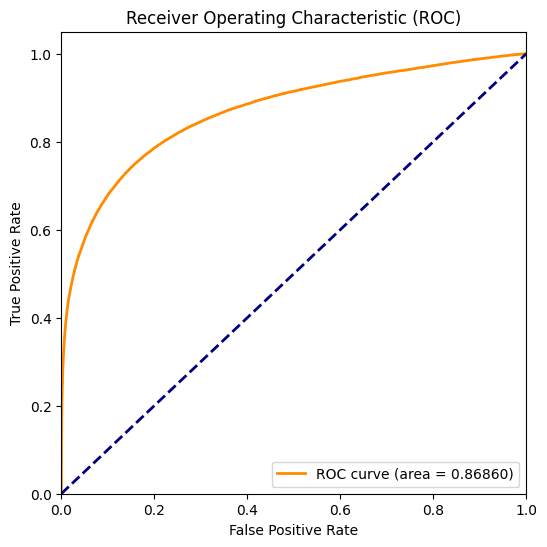


======== Epoch 20 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.23924
  Training epcoh took: 0:09:38

Running Validation...
Confusion Matrix:
[[340867   4466]
 [ 31722  22945]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    345333
           1       0.84      0.42      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.88      0.70      0.75    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.90953
Weighted precision_recall_f1score:
(0.904229532327187, 0.90953, 0.8962259684764428, None)
  Accuracy: 0.90954


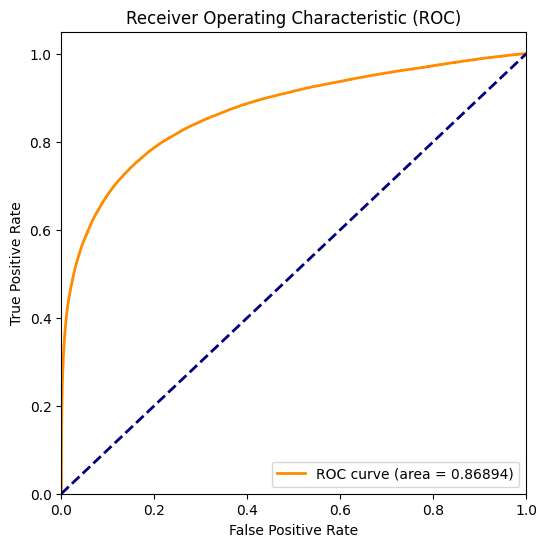


======== Epoch 21 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:48.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.23834
  Training epcoh took: 0:09:37

Running Validation...
Confusion Matrix:
[[339390   5943]
 [ 30135  24532]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.80      0.45      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.72      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.909805
Weighted precision_recall_f1score:
(0.9029428384503664, 0.909805, 0.8985173030818208, None)
  Accuracy: 0.909

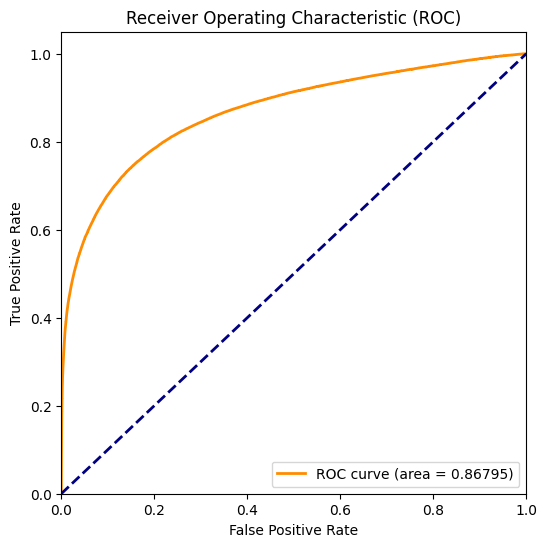


======== Epoch 22 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:36.
  Batch   400  of    800.    Elapsed: 0:04:48.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:25.

  Average training loss: 0.23771
  Training epcoh took: 0:09:37

Running Validation...
Confusion Matrix:
[[340850   4483]
 [ 31594  23073]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95    345333
           1       0.84      0.42      0.56     54667

    accuracy                           0.91    400000
   macro avg       0.88      0.70      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9098075
Weighted precision_recall_f1score:
(0.9045304772382033, 0.9098075, 0.8966414479890358, None)
  Accuracy: 0.9

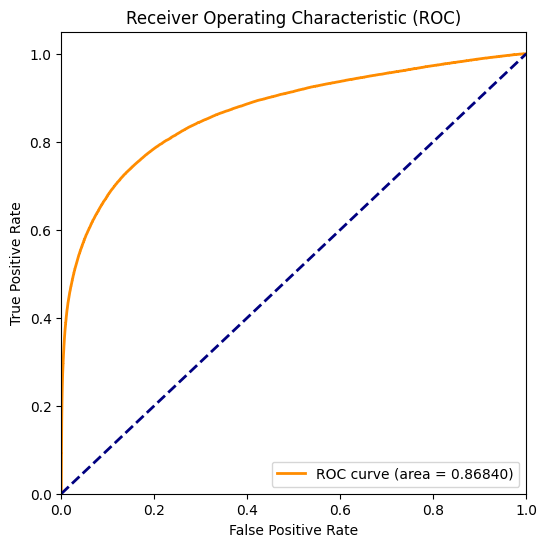


======== Epoch 23 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:26.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:03.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23695
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339422   5911]
 [ 30006  24661]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.72      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9102075
Weighted precision_recall_f1score:
(0.90345343115984, 0.9102075, 0.8990298960724585, None)
  Accuracy: 0.910

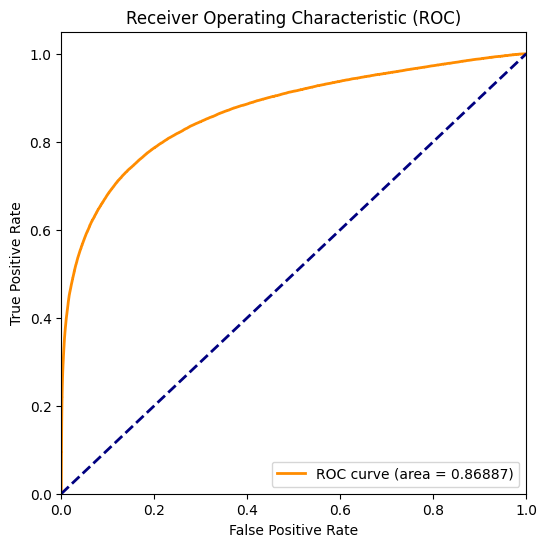


======== Epoch 24 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:14.
  Batch   200  of    800.    Elapsed: 0:02:26.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:03.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23624
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[338797   6536]
 [ 29572  25095]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.79      0.46      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.72      0.77    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.90973
Weighted precision_recall_f1score:
(0.9024532423636152, 0.90973, 0.8991386784029347, None)
  Accuracy: 0.90974

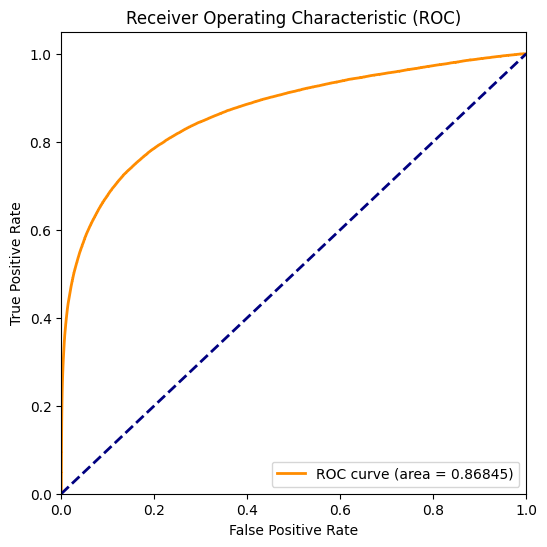


======== Epoch 25 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:13.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23549
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339628   5705]
 [ 30338  24329]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9098925
Weighted precision_recall_f1score:
(0.9032447147883623, 0.9098925, 0.8983413643213563, None)
  Accuracy: 0.9

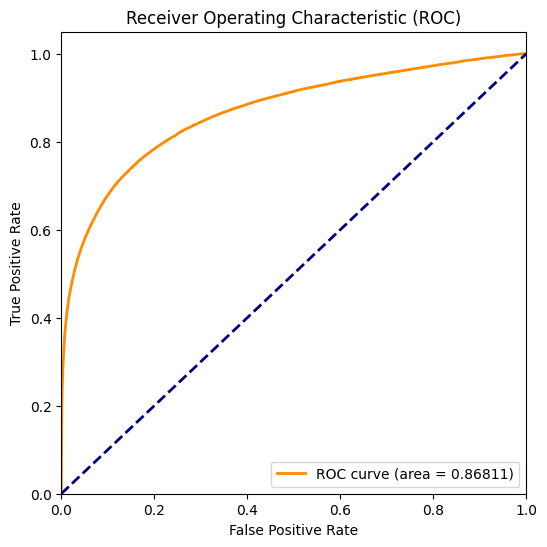


======== Epoch 26 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23511
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339605   5728]
 [ 30269  24398]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9100075
Weighted precision_recall_f1score:
(0.903363098441442, 0.9100075, 0.8985285366748345, None)
  Accuracy: 0.91

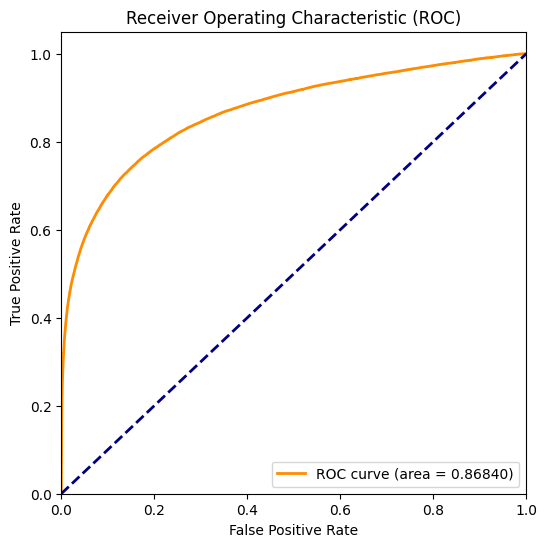


======== Epoch 27 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:15.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23480
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339613   5720]
 [ 30320  24347]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.9099
Weighted precision_recall_f1score:
(0.9032407181411916, 0.9099, 0.898370466254071, None)
  Accuracy: 0.90991
  

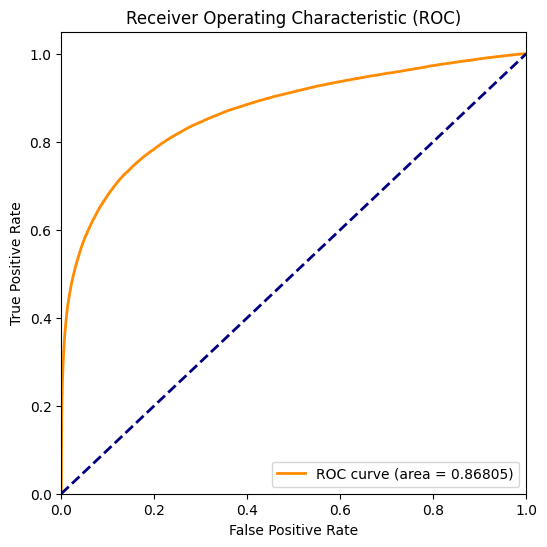


======== Epoch 28 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:25.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23400
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339390   5943]
 [ 30087  24580]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.58     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.72      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.909925
Weighted precision_recall_f1score:
(0.9030877625680923, 0.909925, 0.8986819853957597, None)
  Accuracy: 0.909

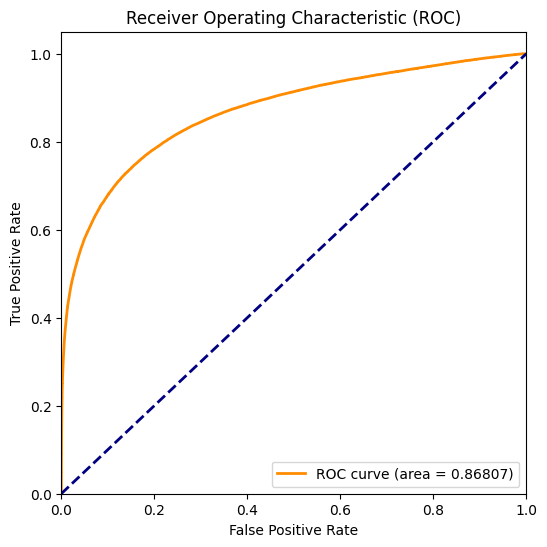


======== Epoch 29 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:37.
  Batch   400  of    800.    Elapsed: 0:04:49.
  Batch   500  of    800.    Elapsed: 0:06:01.
  Batch   600  of    800.    Elapsed: 0:07:13.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23367
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[340029   5304]
 [ 30702  23965]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.82      0.44      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.87      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.909985
Weighted precision_recall_f1score:
(0.903737037562086, 0.909985, 0.8979626510941379, None)
  Accuracy: 0.9099

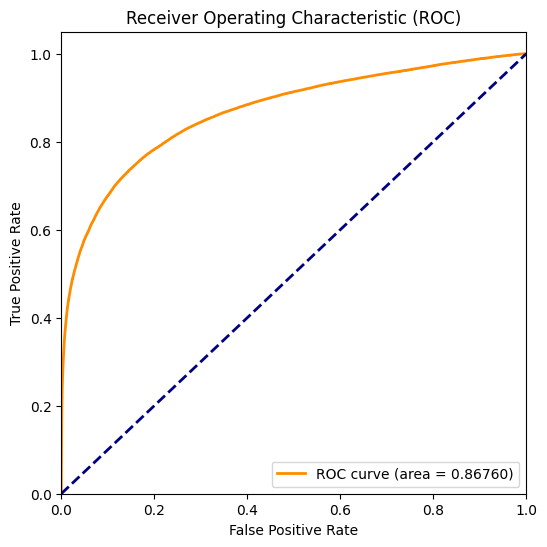


======== Epoch 30 / 30 ========
Training...
  Batch   100  of    800.    Elapsed: 0:01:12.
  Batch   200  of    800.    Elapsed: 0:02:24.
  Batch   300  of    800.    Elapsed: 0:03:38.
  Batch   400  of    800.    Elapsed: 0:04:50.
  Batch   500  of    800.    Elapsed: 0:06:02.
  Batch   600  of    800.    Elapsed: 0:07:14.
  Batch   700  of    800.    Elapsed: 0:08:27.

  Average training loss: 0.23333
  Training epcoh took: 0:09:39

Running Validation...
Confusion Matrix:
[[339633   5700]
 [ 30320  24347]]
Classification reporet:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    345333
           1       0.81      0.45      0.57     54667

    accuracy                           0.91    400000
   macro avg       0.86      0.71      0.76    400000
weighted avg       0.90      0.91      0.90    400000

Accuracy score:
0.90995
Weighted precision_recall_f1score:
(0.903318206474586, 0.90995, 0.8984143641249389, None)
  Accuracy: 0.90996


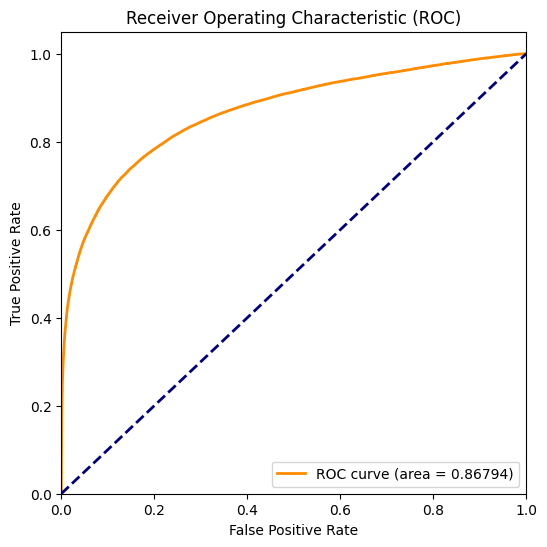


Training complete!


In [ ]:
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []
val_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()


    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.5f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Initialize variables for the confusion matrix
    all_preds = []
    all_labels = []
    all_probabilities = []

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

        # Append predictions and labels to calculate the confusion matrix
        all_preds.extend(np.argmax(logits, axis=1))
        all_labels.extend(label_ids)

        # Append probability scores for ROC curve
        probabilities = torch.softmax(torch.from_numpy(logits), dim=1)
        all_probabilities.extend(probabilities[:, 1].cpu().numpy())

    # Calculate the confusion matrix
    confusion = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(confusion)
    print("Classification reporet:")
    print(classification_report(all_labels, all_preds))
    print("Accuracy score:")
    print(accuracy_score(all_labels, all_preds))
    print("Weighted precision_recall_f1score:")
    print(precision_recall_fscore_support(all_labels, all_preds, average = 'weighted'))

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.5f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    val_values.append(eval_accuracy/nb_eval_steps)

    # Calculate ROC AUC score and plot ROC curve
    roc_auc = roc_auc_score(all_labels, all_probabilities)
    fpr, tpr, _ = roc_curve(all_labels, all_probabilities)

    print("ROC AUC Score: {:.5f}".format(roc_auc))

    # Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.5f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
print("")
print("Training complete!")

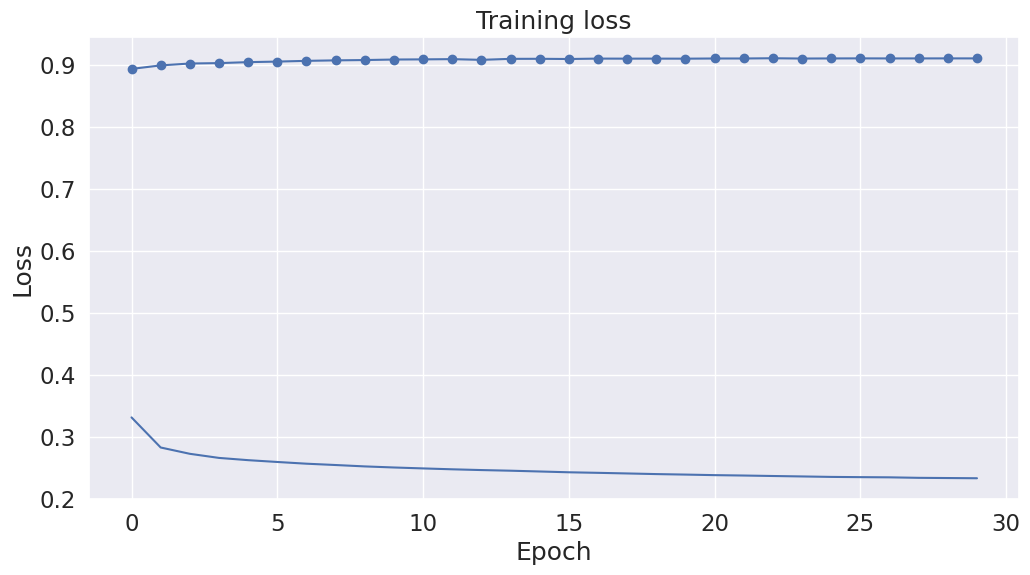

In [ ]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b')
plt.plot(val_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './snp_model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
#torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./snp_model_save/


('./snp_model_save/tokenizer_config.json',
 './snp_model_save/special_tokens_map.json',
 './snp_model_save/vocab.txt',
 './snp_model_save/added_tokens.json')

In [ ]:
!ls -lh ./snp_model_save/

total 55M
-rw-r--r-- 1 root root  650 Oct  3 11:51 config.json
-rw-r--r-- 1 root root  55M Oct  3 11:51 pytorch_model.bin
-rw-r--r-- 1 root root  125 Oct  3 11:51 special_tokens_map.json
-rw-r--r-- 1 root root  998 Oct  3 11:51 tokenizer_config.json
-rw-r--r-- 1 root root 227K Oct  3 11:51 vocab.txt


In [ ]:
!ls -l --block-size=M ./snp_model_save/pytorch_model.bin

-rw-r--r-- 1 root root 55M Oct  3 11:51 ./snp_model_save/pytorch_model.bin


In [ ]:
ls

drive/  hg003_snps.csv  sample_data/  snp_model_save/  unique_words.txt  ww.txt


In [ ]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./snp_model_save/ ./drive/MyDrive/Colab\ Notebooks/deepref/

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
#model = model_class.from_pretrained(output_dir)
#tokenizer = tokenizer_class.from_pretrained(output_dir)

# Copy the model to the GPU.
#model.to(device)